In [23]:
# Importaciones de las librerias q voy a utilizar
import pandas as pd, numpy as np

# Importamos librerias para graficar
import matplotlib.pyplot as plt, seaborn as sns

# Importamos librerias adicionales para trabajar con fechas y directorios
import datetime
import os

# usamos esta opción para que muestre los graficos en la celda de output
%matplotlib inline

# DIR donde voy a trabajar
os.chdir("D:/Teclab/datos/api3/modulo3/")

In [24]:
# Importamos el archivo con los datos, y definimos un campo de fecha
temp = pd.read_csv("datos_meteorologicos.csv", parse_dates = ["fecha"], encoding = "latin-1")

temp["fecha"] = pd.to_datetime(temp["fecha"])

# Generamos una variable de amplitud tecnica
temp["amplitud"] = temp["maxima"] - temp["minima"]

# Generamos un dataframe que contenga solo los datos de Aeroparque, primero hacemos una copia del general
aep = temp.copy()
aep=aep[(aep["estacion"] == "AEROPARQUE AERO")]

In [36]:
# Convierte la columna "fecha" en un objeto de fecha
# # aep["fecha"] = pd.to_datetime(aep["fecha"])

# Genera la variable mes
aep["mes"] = aep["fecha"].dt.month

# Genera la variable año
aep["año"] = aep["fecha"].dt.year

aep

,fecha,maxima,minima,estacion,amplitud,mes,año
0,2021-01-01,21.9,7.2,AEROPARQUE AERO,14.7,1,2021
3,2021-01-02,25.6,8.4,AEROPARQUE AERO,17.2,1,2021
6,2021-01-03,28.4,18.3,AEROPARQUE AERO,10.1,1,2021
9,2021-01-04,26.2,15.5,AEROPARQUE AERO,10.7,1,2021
12,2021-01-05,35.5,1.7,AEROPARQUE AERO,33.8,1,2021
...,...,...,...,...,...,...,...
3270,2023-12-27,25.7,7.7,AEROPARQUE AERO,18.0,12,2023
3273,2023-12-28,38.5,17.8,AEROPARQUE AERO,20.7,12,2023
3276,2023-12-29,36.7,4.5,AEROPARQUE AERO,32.2,12,2023
3279,2023-12-30,34.6,9.5,AEROPARQUE AERO,25.1,12,2023


<Axes: xlabel='fecha'>

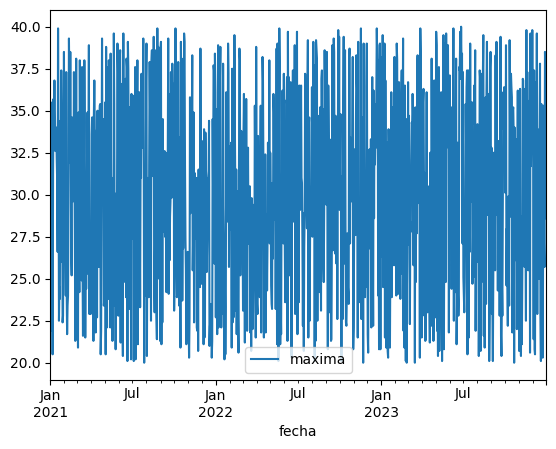

In [45]:
# Hacemos un grafico de linea
aep.plot(x = "fecha", y = "maxima", kind="line")

In [80]:
# Agergamos las observaciones (a nivel dia) a los totales mensuales
aep_2022 = aep[aep["año"] == 2022]
aep_2022

,fecha,maxima,minima,estacion,amplitud,mes,año
1095,2022-01-01,22.7,13.3,AEROPARQUE AERO,9.4,1,2022
1098,2022-01-02,35.1,14.2,AEROPARQUE AERO,20.9,1,2022
1101,2022-01-03,32.4,13.1,AEROPARQUE AERO,19.3,1,2022
1104,2022-01-04,21.7,15.0,AEROPARQUE AERO,6.7,1,2022
1107,2022-01-05,27.9,1.4,AEROPARQUE AERO,26.5,1,2022
...,...,...,...,...,...,...,...
2175,2022-12-27,20.8,18.2,AEROPARQUE AERO,2.6,12,2022
2178,2022-12-28,38.9,5.9,AEROPARQUE AERO,33.0,12,2022
2181,2022-12-29,39.0,9.1,AEROPARQUE AERO,29.9,12,2022
2184,2022-12-30,20.8,3.0,AEROPARQUE AERO,17.8,12,2022


<Axes: xlabel='fecha'>

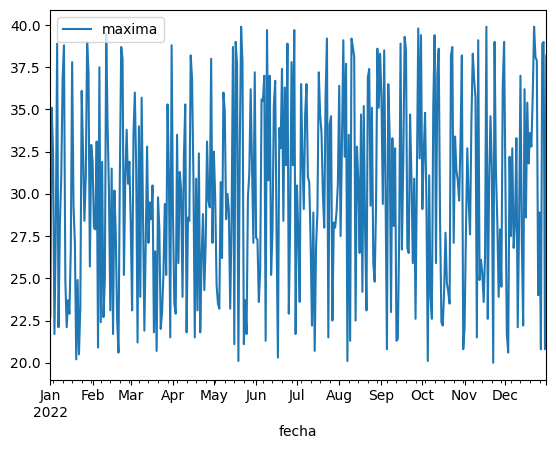

In [81]:
# Grafico de linea  para la temperatura maxima en aeroparque por mes
aep_2022.plot(x = "fecha", y="maxima", kind="line")

In [83]:
# Agregamos las observaciones de una frecuencia diaria a una mensual
aep_2022_mes = aep_2022.groupby(["mes"], as_index=False).agg({"maxima": "mean"})
aep_2022_mes

,mes,maxima
0,1,29.090323
1,2,29.382143
2,3,28.125806
3,4,28.836667
4,5,29.900000
5,6,31.170000
6,7,30.135484
7,8,31.774194
8,9,30.933333
9,10,29.619355


<Axes: xlabel='mes'>

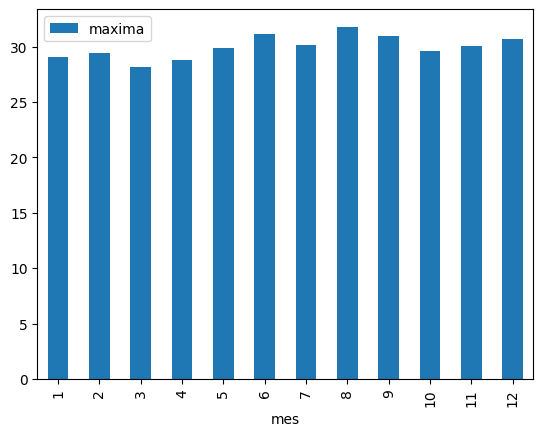

In [84]:
# Grafico de barras horizontales
aep_2022_mes.plot(x="mes", y="maxima", kind="bar")

<Axes: title={'center': 'Amplitud termica'}, xlabel='fecha', ylabel='Temperatura'>

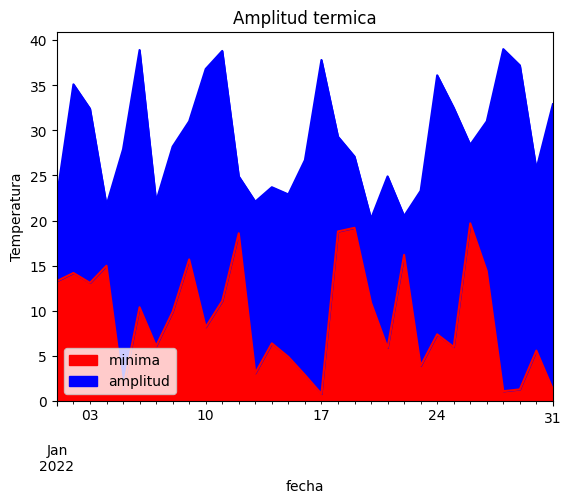

In [88]:
# Grafico de area
"""
aep_2022.plot.area(x = "fecha", y=["minima", "amplitud"], color = ["white", "blue"],
              title = "Amplitud termica", ylabel= "Temperatura en °C", legend = False)"""

aep_2022_enero = aep_2022[aep_2022["mes"] == 1]
aep_2022_enero
aep_2022_enero.plot.area(x="fecha", y=["minima", "amplitud"], color = ["red", "Blue"], title = "Amplitud termica", ylabel = "Temperatura")

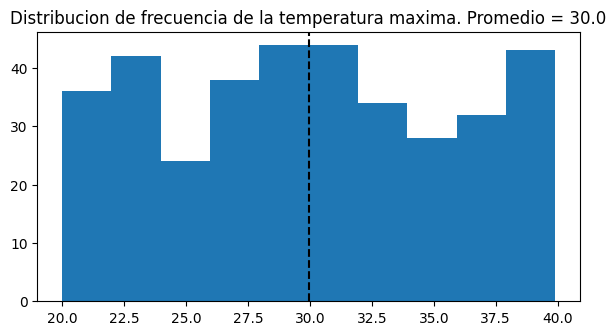

In [91]:
# Histograma
plt.figure(figsize=[7, 3.5])
plt.hist(aep_2022["maxima"])
plt.title("Distribucion de frecuencia de la temperatura maxima. Promedio = " + str(round(aep_2022["maxima"].mean(), 1)))
plt.axvline(x = aep_2022["maxima"].mean(), color="black", linestyle = "--")

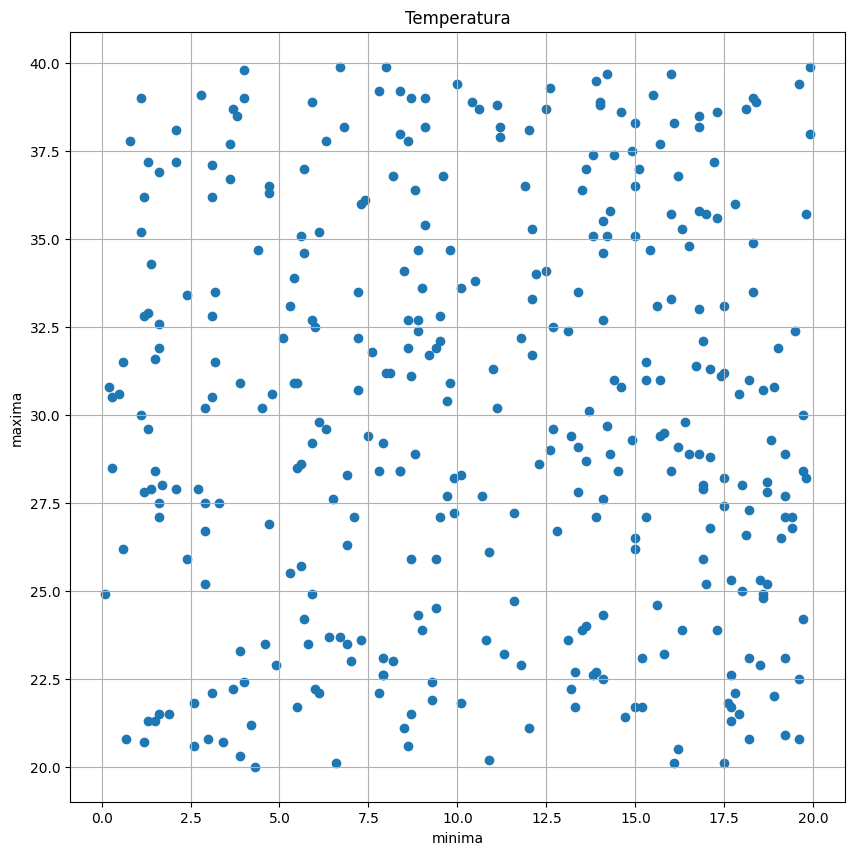

In [96]:
# Diagrama de dispersion o scatterplot

# Podemos cambiar el tamaño del grafico
plt.figure(figsize=[10,10])

# Definamos el tipo de grafico y las variables
plt.scatter(aep_2022["minima"], aep_2022["maxima"])

# Definamos los titulos de los ejes
plt.xlabel("minima"); plt.ylabel("maxima")

# Titulo del grafico
plt.title("Temperatura")

# Agrego lineas cuadriculadas
plt.grid()

In [97]:
# Coeficiente de correlacion
np.corrcoef(aep_2022["maxima"], aep_2022["minima"])

array([[ 1.        , -0.00401151],
       [-0.00401151,  1.        ]])

Text(0.5, 1.0, 'Boxplot: Temperatura maxima aeroparque')

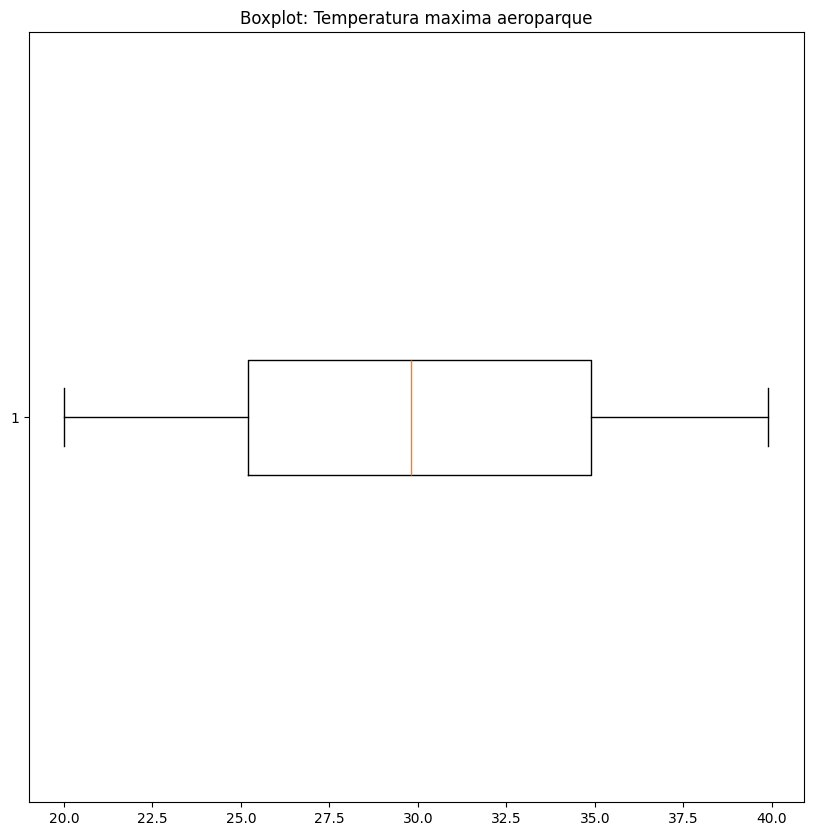

In [100]:
# Grafico Boxplot
plt.figure(figsize = [10, 10])
plt.boxplot(aep_2022["maxima"], vert = False)
plt.title("Boxplot: Temperatura maxima aeroparque")

In [103]:
# Cuartiles de la distancia
print("Q1 = " + str(round(np.percentile(aep["maxima"], 25) ,2)))
print("Q2 o mediana = " + str(round(np.percentile(aep["maxima"], 50) ,2)))
print("Q3 = " + str(round(np.percentile(aep["maxima"], 75) ,2)))

Q1 = 24.8
Q2 o mediana = 30.1
Q3 = 35.15


Text(0, 0.5, 'Densidad')

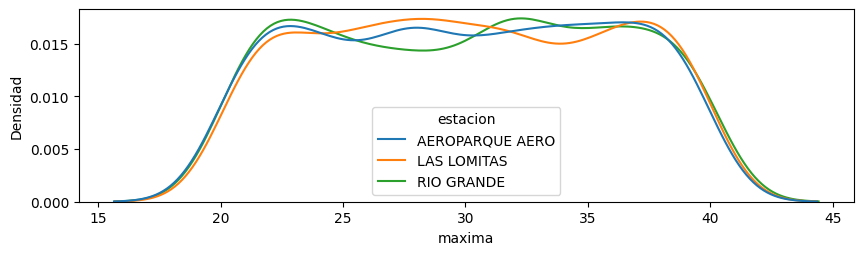

In [108]:
# Seaborn Graficos de densidad o de densidad de kernel
plt.figure(figsize=(10,2.5))
sns.kdeplot(data = temp, x= "maxima", hue = "estacion")
plt.ylabel("Densidad")

<Axes: xlabel='minima', ylabel='maxima'>

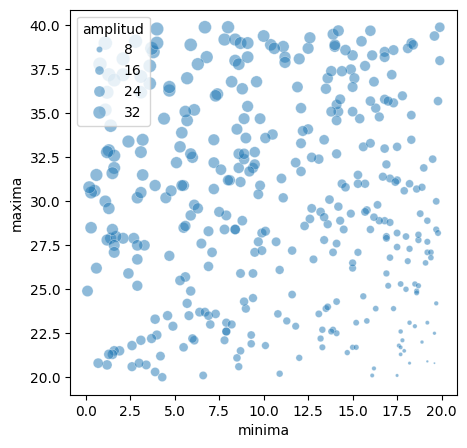

In [109]:
# Grafico de burbuja
plt.figure(figsize=(5,5))
sns.scatterplot(data = aep_2022, x = "minima", y = "maxima", size = "amplitud", alpha = 0.5, sizes = (2,100))

<Axes: xlabel='estacion', ylabel='maxima'>

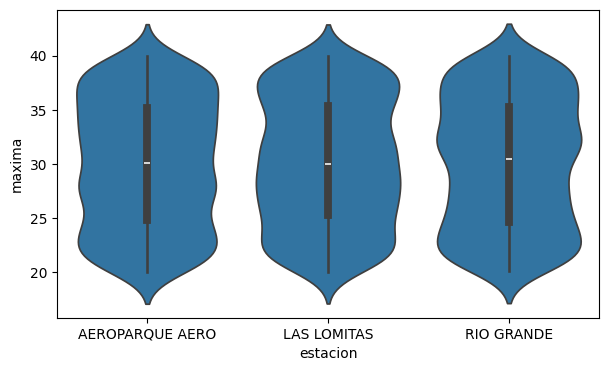

In [113]:
# Gráficos de violín
plt.figure(figsize=[7,4])
sns.violinplot(data=temp, x = "estacion", y = "maxima")

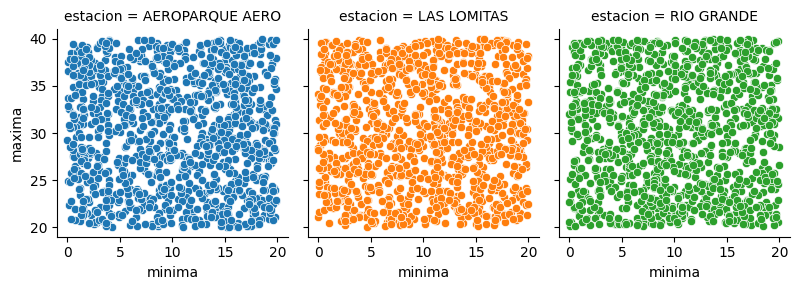

In [115]:
# Paneles graficos
facet = sns.FacetGrid(temp, col = "estacion", hue = "estacion", height = 3, aspect = 0.9)
facet.map(sns.scatterplot, "minima", "maxima")

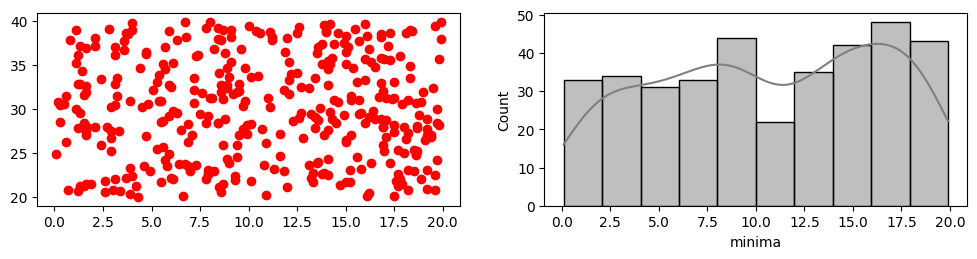

In [127]:
# Subgraficos
chart = plt.figure(figsize=(12, 2.5))
# Usamos la funcion subplot(fila, columna, orden grafico)
# subgrafico 1: diagrama de dispercion de maxima y minima
plt.subplot(121)
plt.scatter(aep_2022["minima"], aep_2022["maxima"], color = "red")

# subgrafico2: histograma de la amplitus termica
plt.subplot(122)
sns.histplot(data = aep_2022, x = "minima", color = "gray", kde = True)
# Guardo el grafico en un png
chart.savefig("figura.png")

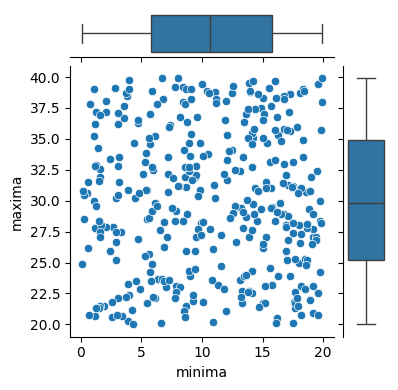

In [128]:
# Boxplot marginales con <<JoinGrid>> ya que nos permitira personalizar mas caracteristicas del grafico

j = sns.JointGrid(data = aep_2022, x = "minima", y = "maxima", height = 4)
j.plot_joint(sns.scatterplot)
j.plot_marginals(sns.boxplot)

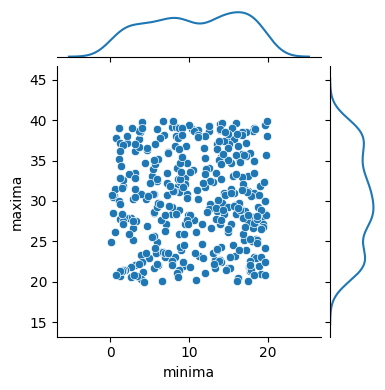

In [129]:
# Funciones de densidad marginales
j = sns.JointGrid(data = aep_2022, x = "minima", y = "maxima", height=4)
j.plot_joint(sns.scatterplot)
j.plot_marginals(sns.kdeplot)

<Axes: xlabel='minima', ylabel='maxima'>

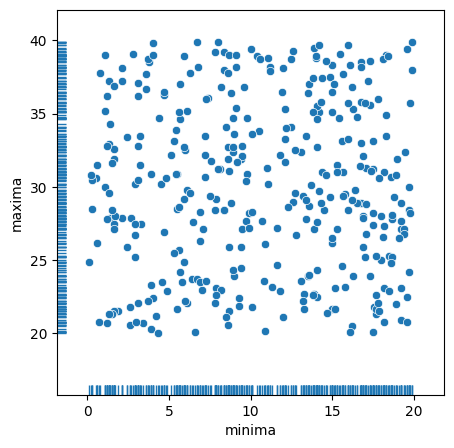

In [131]:
# Rugplot: Permite incluir en los ejes los rugs o marcas para cada observacion
plt.figure(figsize = [5,5])

# grafico en el interior el diagram de dispercion
sns.scatterplot(data = aep_2022, x = "minima", y = "maxima")

# Grafico con rugs las marcas de las observaciones individuales
sns.rugplot(data = aep_2022, x = "minima", y = "maxima")